
[[ 0  0  0 ...,  0  0  0]
 [ 0 40 36 ..., 52 35  0]
 [ 0 52 71 ..., 39 47  0]
 ..., 
 [ 0 20 19 ..., 31 92  0]
 [ 0 49 29 ..., 31 38  0]
 [ 0  0  0 ...,  0  0  0]]
(1480, 1552)
[[ 0  0  0 ...,  0  0  0]
 [ 0 40 36 ..., 52 35  0]
 [ 0 52 71 ..., 39 47  0]
 ..., 
 [ 0 20 19 ..., 31 92  0]
 [ 0 49 29 ..., 31 38  0]
 [ 0  0  0 ...,  0  0  0]]


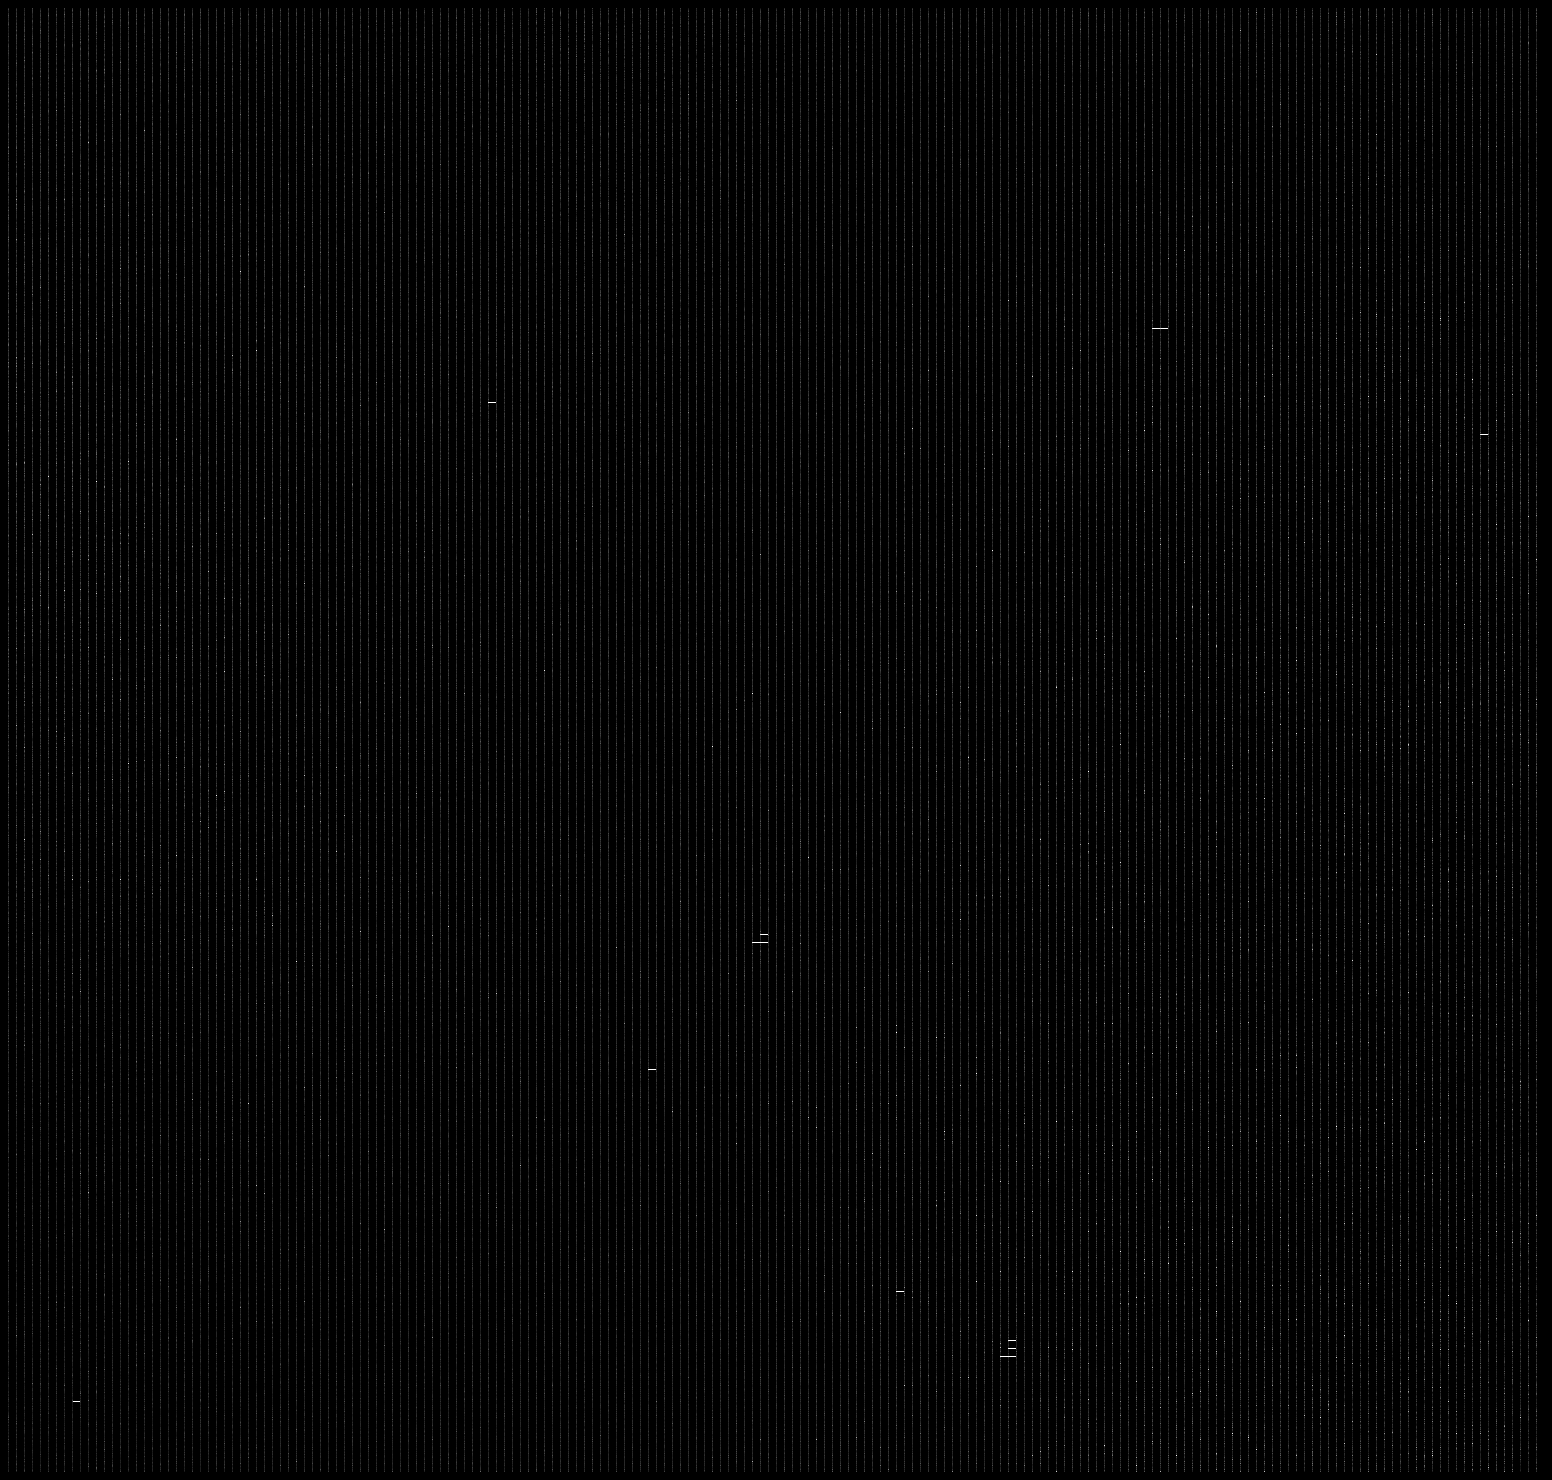

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
def katalog(slownik):
    for x in slownik.keys():
        if type(slownik[x]) ==  h5py._hl.group.Group: #czyli dana nazwa jest grupa
            slownik[x] = {z : slownik[x][z]  for z in  slownik[x] }
            #  slownik pod danym kluczem 
            #ma katalog to z tego robie  slownik ktory ajko klucz ma nazwe rzeczy w tym katalogu 
            #a wartsoc to jest referencja do tego pliku/katalogu
            katalog(slownik[x])
    return slownik
def dane_obrazu (slownik):
    for x in slownik.keys():
        if x == "data":
            if type(slownik[x]) == h5py._hl.dataset.Dataset:
                return slownik[x]
            else:
                return dane_obrazu(slownik[x])
    return None 
def table(file):
    
        with  h5py.File(file,"r") as f:
            diction = {x:f[x] for x in f}
            diction2 = katalog(diction) 
            #print(diction2) 
            data = dane_obrazu(diction2)
            array = np.array(data[...])
            print()
            print(array)
            print(data.shape)
            #print(array[185:369,776:969])
            #plt.subplot(121)
            plt.imshow(np.uint8(array),"plasma")
            #plt.subplot(122)
            #b = plt.imshow(array[:185,776:969],aspect='equal')
            from PIL import Image
            print(np.uint8(array))
            img = Image.fromarray(np.uint0(array),mode="L")
            display(img)

            #plt.show()
table("Plik3.h5")